## Importing necessary libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Read test image and show

In [2]:
img = cv2.imread('./test_images/320500.webp')
img.shape

(320, 320, 3)

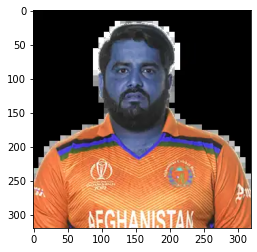

In [3]:
plt.imshow(img)

## Convert to gray image and detect the face

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

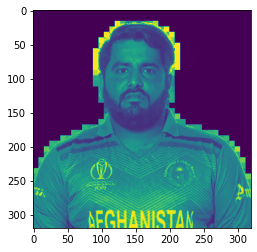

In [6]:
plt.imshow(gray)

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 99,  48, 101, 101]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(99, 48, 101, 101)

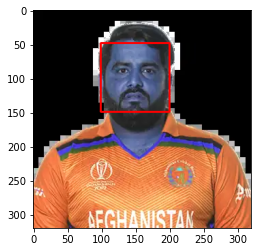

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

## Extract face image and detect the eyes

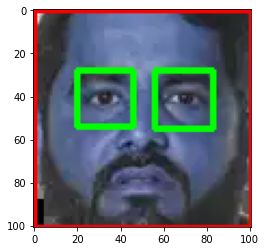

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(roi_color,cmap='gray')

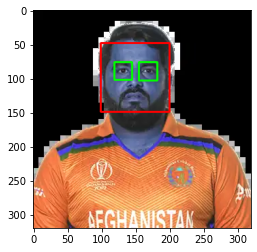

In [11]:
plt.imshow(face_img,cmap='gray')

## Function for detection of face and eyes

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    faces_list=[]
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) > 0:
        for i in range(faces.shape[0]):
            (x,y,w,h) = faces[i]
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                faces_list.append(roi_color)
        return faces_list
    else:
        print('No recognizable face')

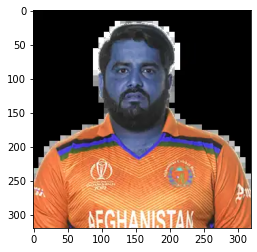

In [13]:
orig = cv2.imread('./test_images/320500.webp')
plt.imshow(orig)

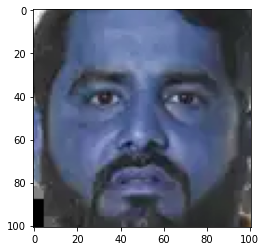

In [14]:
crpd = get_cropped_image_if_2_eyes('./test_images/320500.webp')
plt.imshow(crpd[0])

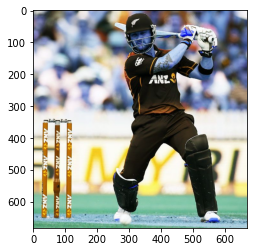

In [15]:
orig1 = cv2.imread('./test_images/Rediff Cricket.jpg')
plt.imshow(orig1)

In [16]:
crpd1 = get_cropped_image_if_2_eyes('./test_images/Rediff Cricket.jpg')

No recognizable face


## Setup directories for cropped faces

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset_cropped/"
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/ab_devilliers',
 './dataset/brendon_mccullum',
 './dataset/chris_gayle',
 './dataset/dale_steyn',
 './dataset/hardik_pandya',
 './dataset/james_anderson',
 './dataset/ms_dhoni',
 './dataset/muttiah_muralitharan',
 './dataset/pat_cummins',
 './dataset/rashid_khan',
 './dataset/ravi_ashwin',
 './dataset/umran_malik']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

## Create cropped faces and save in separate location

In [ ]:
cropped_image_dirs = []
invalid_formats=['html']

for img_dir in img_dirs:
    count = 1
    crics_name = img_dir.split('/')[-1]
    for entry in os.scandir(img_dir):
        orig_file = entry.path.replace("\\","/")
        print(orig_file)
        try:
            if(all(orig_file.split('.')[-1] != item for item in invalid_formats)): 
                roi_color = np.array(get_cropped_image_if_2_eyes(orig_file))
                if roi_color.size > 1:
                    for i in range(roi_color.shape[0]):
                        cropped_folder = path_to_cr_data + crics_name
                        if not os.path.exists(cropped_folder):
                            os.mkdir(cropped_folder)
                            cropped_image_dirs.append(cropped_folder)
                            print("Generating cropped images in folder: ",cropped_folder)
                        cropped_file_name = crics_name + str(count) + ".png"
                        cropped_file_path = cropped_folder + "/" + cropped_file_name
                        cv2.imwrite(cropped_file_path, roi_color[i])
                        count += 1
        except:
            print('Unknown exception')